In [27]:
import cv2
from matplotlib import pyplot as plt
#from metrics import UCIQE,UIQM,CCF
from skimage.color import rgb2hsv
import numpy as np
import pandas as pd
import os
import glob

#### Metricas

In [56]:
def analyze(path_dataset,*metricas):
    """Essa função aplica a cada imagem do dataset as metricas que só recebem uma imagem como parametro 
    e retorna um DataFrame com os resultados para todos os data_sets      
    OBS: preciso adaptar para os separadores especificos do SO ! """
    result=[]
    for folder in sorted(os.listdir(path_dataset)):
        cur_folder = path_dataset + "\\" + folder                   # adaptar separadores aqui  
        print("Cur_folder: "+cur_folder)       
        
        results_cur_folder=[]
        for image_path in sorted(glob.glob(cur_folder + "\*")):     # adaptar separadores aqui
                label_img=image_path.split("\\")[-1]  # auxiliar    # adaptar separadores aqui
                label_metricas=["Imagens",]           # auxiliar
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # conversão do espaço de cores
                image=cv2.resize(image,(360,240))

                results_cur_image=[label_img,] # lista com os resultados para a imagem atual
                
                for metrica in metricas:
                    a=metrica(image)
                    results_cur_image.append(a)
                    label_metricas.append(metrica.__name__)

                results_cur_folder.append(results_cur_image)


        df_cur_folder=pd.DataFrame(results_cur_folder,columns=label_metricas)
        result.append(df_cur_folder)

    result=pd.concat(result,axis=0,join="inner",keys=['bom','excelente','pessimo','Ruim'])  # alterar as keys conforme as classificacoes
    return result
        

In [ ]:
path="dataset_pecem"
dfs=[]
for cam in os.listdir(path):
    a=analyze(path+f'\\{cam}',UCIQE,UIQM)
    dfs.append(a)

In [117]:
dfs_final=pd.concat(dfs,axis=0,join="inner",keys=['cam_124_1','cam_321','cam_323','cam_50','cam_77_3'])  # alterar as keys conforme as classificacoes
dfs_final.loc[:,["UCIQE","UIQM"]].describe()

,UCIQE,UIQM
count,40.000000,40.000000
mean,27.800739,4.595357
std,2.526750,2.270607
min,21.454845,2.057259
25%,26.696621,3.412616
50%,28.129734,3.964493
75%,29.546808,5.109123
max,31.129649,13.484787


In [118]:
display(dfs_final)

Imagens      UCIQE       UIQM
cam_124_1 bom       0  Imagem21.jpg  28.212535   4.197346
                    1  Imagem22.jpg  27.718210   3.390817
          excelente 0  Imagem19.jpg  30.830930   9.549523
                    1  Imagem20.jpg  30.552329   5.514967
          pessimo   0  Imagem25.jpg  30.814622   2.887709
                    1  Imagem26.jpg  27.250010   2.662040
          Ruim      0  Imagem23.jpg  27.667188   3.675630
                    1  Imagem24.jpg  27.038290   4.015786
cam_321   bom       0  Imagem29.jpg  28.005474   4.516983
                    1  Imagem30.jpg  29.557159   4.019890
          excelente 0  Imagem27.jpg  28.921211   5.703720
                    1  Imagem28.jpg  29.787025   5.062187
          pessimo   0  Imagem33.jpg  27.135005   3.523423
                    1  Imagem34.jpg  30.523744   3.080190
          Ruim      0  Imagem31.jpg  30.502934   3.881566
                    1  Imagem32.jpg  29.360550   2.322193
cam_323   bom       0  Imagem37.jpg  29.271811   4.507287
                    1  Imagem38.jpg  28.915902   3.740224
          excelente 0  Imagem35.jpg  31.129649   8.050103
                    1  Imagem36.jpg  29.980360   5.249931
          pessimo   0  Imagem41.jpg  29.543358   3.491344
                    1  Imagem42.jpg  29.209283   3.939283
          Ruim      0  Imagem39.jpg  29.503766   2.162887
                    1  Imagem40.jpg  28.474209   3.705688
cam_50    bom       0   Imagem5.jpg  28.339155   4.172445
                    1   Imagem6.jpg  21.672178   6.045041
          excelente 0   Imagem1.jpg  27.444648  13.484787
                    1   Imagem2.jpg  23.730295   9.905216
          pessimo   0  Imagem10.jpg  26.469169   4.775191
                    1   Imagem9.jpg  21.454845   3.989702
          Ruim      0   Imagem7.jpg  23.491877   3.713029
                    1   Imagem8.jpg  22.579092   6.971282
cam_77_3  bom       0  Imagem13.jpg  26.713895   2.702942
                    1  Imagem14.jpg  25.903325   3.562776
          excelente 0  Imagem11.jpg  27.953340   5.316921
                    1  Imagem12.jpg  30.677882   4.620593
          pessimo   0  Imagem17.jpg  26.644800   2.825865
                    1  Imagem18.jpg  28.046934   3.414982
          Ruim      0  Imagem15.jpg  24.770178   2.057259
                    1  Imagem16.jpg  26.232389   3.405517

#### Canais

In [28]:
def newDir(path_avaliado):
    if not os.path.lexists(path_avaliado):
        os.mkdir(path_avaliado)

##### RGB

In [2]:
def splitRGB(path_dataset,path_destination):
    path=path_destination+'\\RGB'
    newDir(path)
    newDir(path+'\\R')
    newDir(path+'\\G')
    newDir(path+'\\B')
    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        newDir(path+'\\R'+f'\\{cam}')
        newDir(path+'\\G'+f'\\{cam}')
        newDir(path+'\\B'+f'\\{cam}')

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       

            newDir(path+'\\R'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\G'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\B'+f'\\{cam}'+f'\\{folder}')

            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    R,G,B=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\R'+f'\\{cam}'+f'\\{folder}\\'+f'R_{label_img}',R)
                    cv2.imwrite(path+'\\G'+f'\\{cam}'+f'\\{folder}\\'+f'G_{label_img}',G)
                    cv2.imwrite(path+'\\B'+f'\\{cam}'+f'\\{folder}\\'+f'B_{label_img}',B)

In [55]:
splitRGB("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


##### HSV

In [58]:
def splitHSV(path_dataset,path_destination):
    path=path_destination+'\\HSV'
    newDir(path)
    newDir(path+'\\H')
    newDir(path+'\\S')
    newDir(path+'\\V')
    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        newDir(path+'\\H'+f'\\{cam}')
        newDir(path+'\\S'+f'\\{cam}')
        newDir(path+'\\V'+f'\\{cam}')

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       

            newDir(path+'\\H'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\S'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\V'+f'\\{cam}'+f'\\{folder}')

            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV_FULL) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    H,S,V=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\H'+f'\\{cam}'+f'\\{folder}\\'+f'H_{label_img}',H)
                    cv2.imwrite(path+'\\S'+f'\\{cam}'+f'\\{folder}\\'+f'S_{label_img}',S)
                    cv2.imwrite(path+'\\V'+f'\\{cam}'+f'\\{folder}\\'+f'V_{label_img}',V)

In [ ]:
splitHSV("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


##### YCbCr

In [9]:
def splitYCbCr(path_dataset,path_destination): # Y-> Luma;Cb -> Croma de diferença azul; Cr->" " " vermelho
    path=path_destination+'\\YCbCr'
    newDir(path)
    newDir(path+'\\Y')
    newDir(path+'\\Cb')
    newDir(path+'\\Cr')
    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        newDir(path+'\\Y'+f'\\{cam}')
        newDir(path+'\\Cb'+f'\\{cam}')
        newDir(path+'\\Cr'+f'\\{cam}')

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       

            newDir(path+'\\Y'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\Cb'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\Cr'+f'\\{cam}'+f'\\{folder}')

            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    Y, CR,CB=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\Y'+f'\\{cam}'+f'\\{folder}\\'+f'Y_{label_img}',Y)
                    cv2.imwrite(path+'\\Cb'+f'\\{cam}'+f'\\{folder}\\'+f'Cb_{label_img}',CB)
                    cv2.imwrite(path+'\\Cr'+f'\\{cam}'+f'\\{folder}\\'+f'Cr_{label_img}',CR)

In [10]:
splitYCbCr("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


In [7]:
from cv2 import cvtColor

def splitLab(path_dataset,path_destination):
    path=path_destination+'\\Lab'
    newDir(path)
    newDir(path+'\\L')
    newDir(path+'\\a')
    newDir(path+'\\b')
    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)

        newDir(path+'\\L'+f'\\{cam}')
        newDir(path+'\\a'+f'\\{cam}')
        newDir(path+'\\b'+f'\\{cam}')

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       

            newDir(path+'\\L'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\a'+f'\\{cam}'+f'\\{folder}')
            newDir(path+'\\b'+f'\\{cam}'+f'\\{folder}')

            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=image_path.split("\\")[-1]            
                    image = cv2.imread(image_path)
                    image = cvtColor(image,cv2.COLOR_BGR2RGB)
                    image = cv2.cvtColor(image,cv2.COLOR_RGB2LAB) # conversão do espaço de cores
                    # image=cv2.regitsize(image,(360,240))
                    L,A,B=cv2.split(image)

                    # escrita
                    cv2.imwrite(path+'\\L'+f'\\{cam}'+f'\\{folder}\\'+f'L_{label_img}',L)
                    cv2.imwrite(path+'\\a'+f'\\{cam}'+f'\\{folder}\\'+f'a_{label_img}',A)
                    cv2.imwrite(path+'\\b'+f'\\{cam}'+f'\\{folder}\\'+f'b_{label_img}',B)

In [8]:
splitLab("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Cur_cam: dataset_pecem\cam_321
Cur_cam: dataset_pecem\cam_323
Cur_cam: dataset_pecem\cam_50
Cur_cam: dataset_pecem\cam_77_3


#### EXEMPLOS

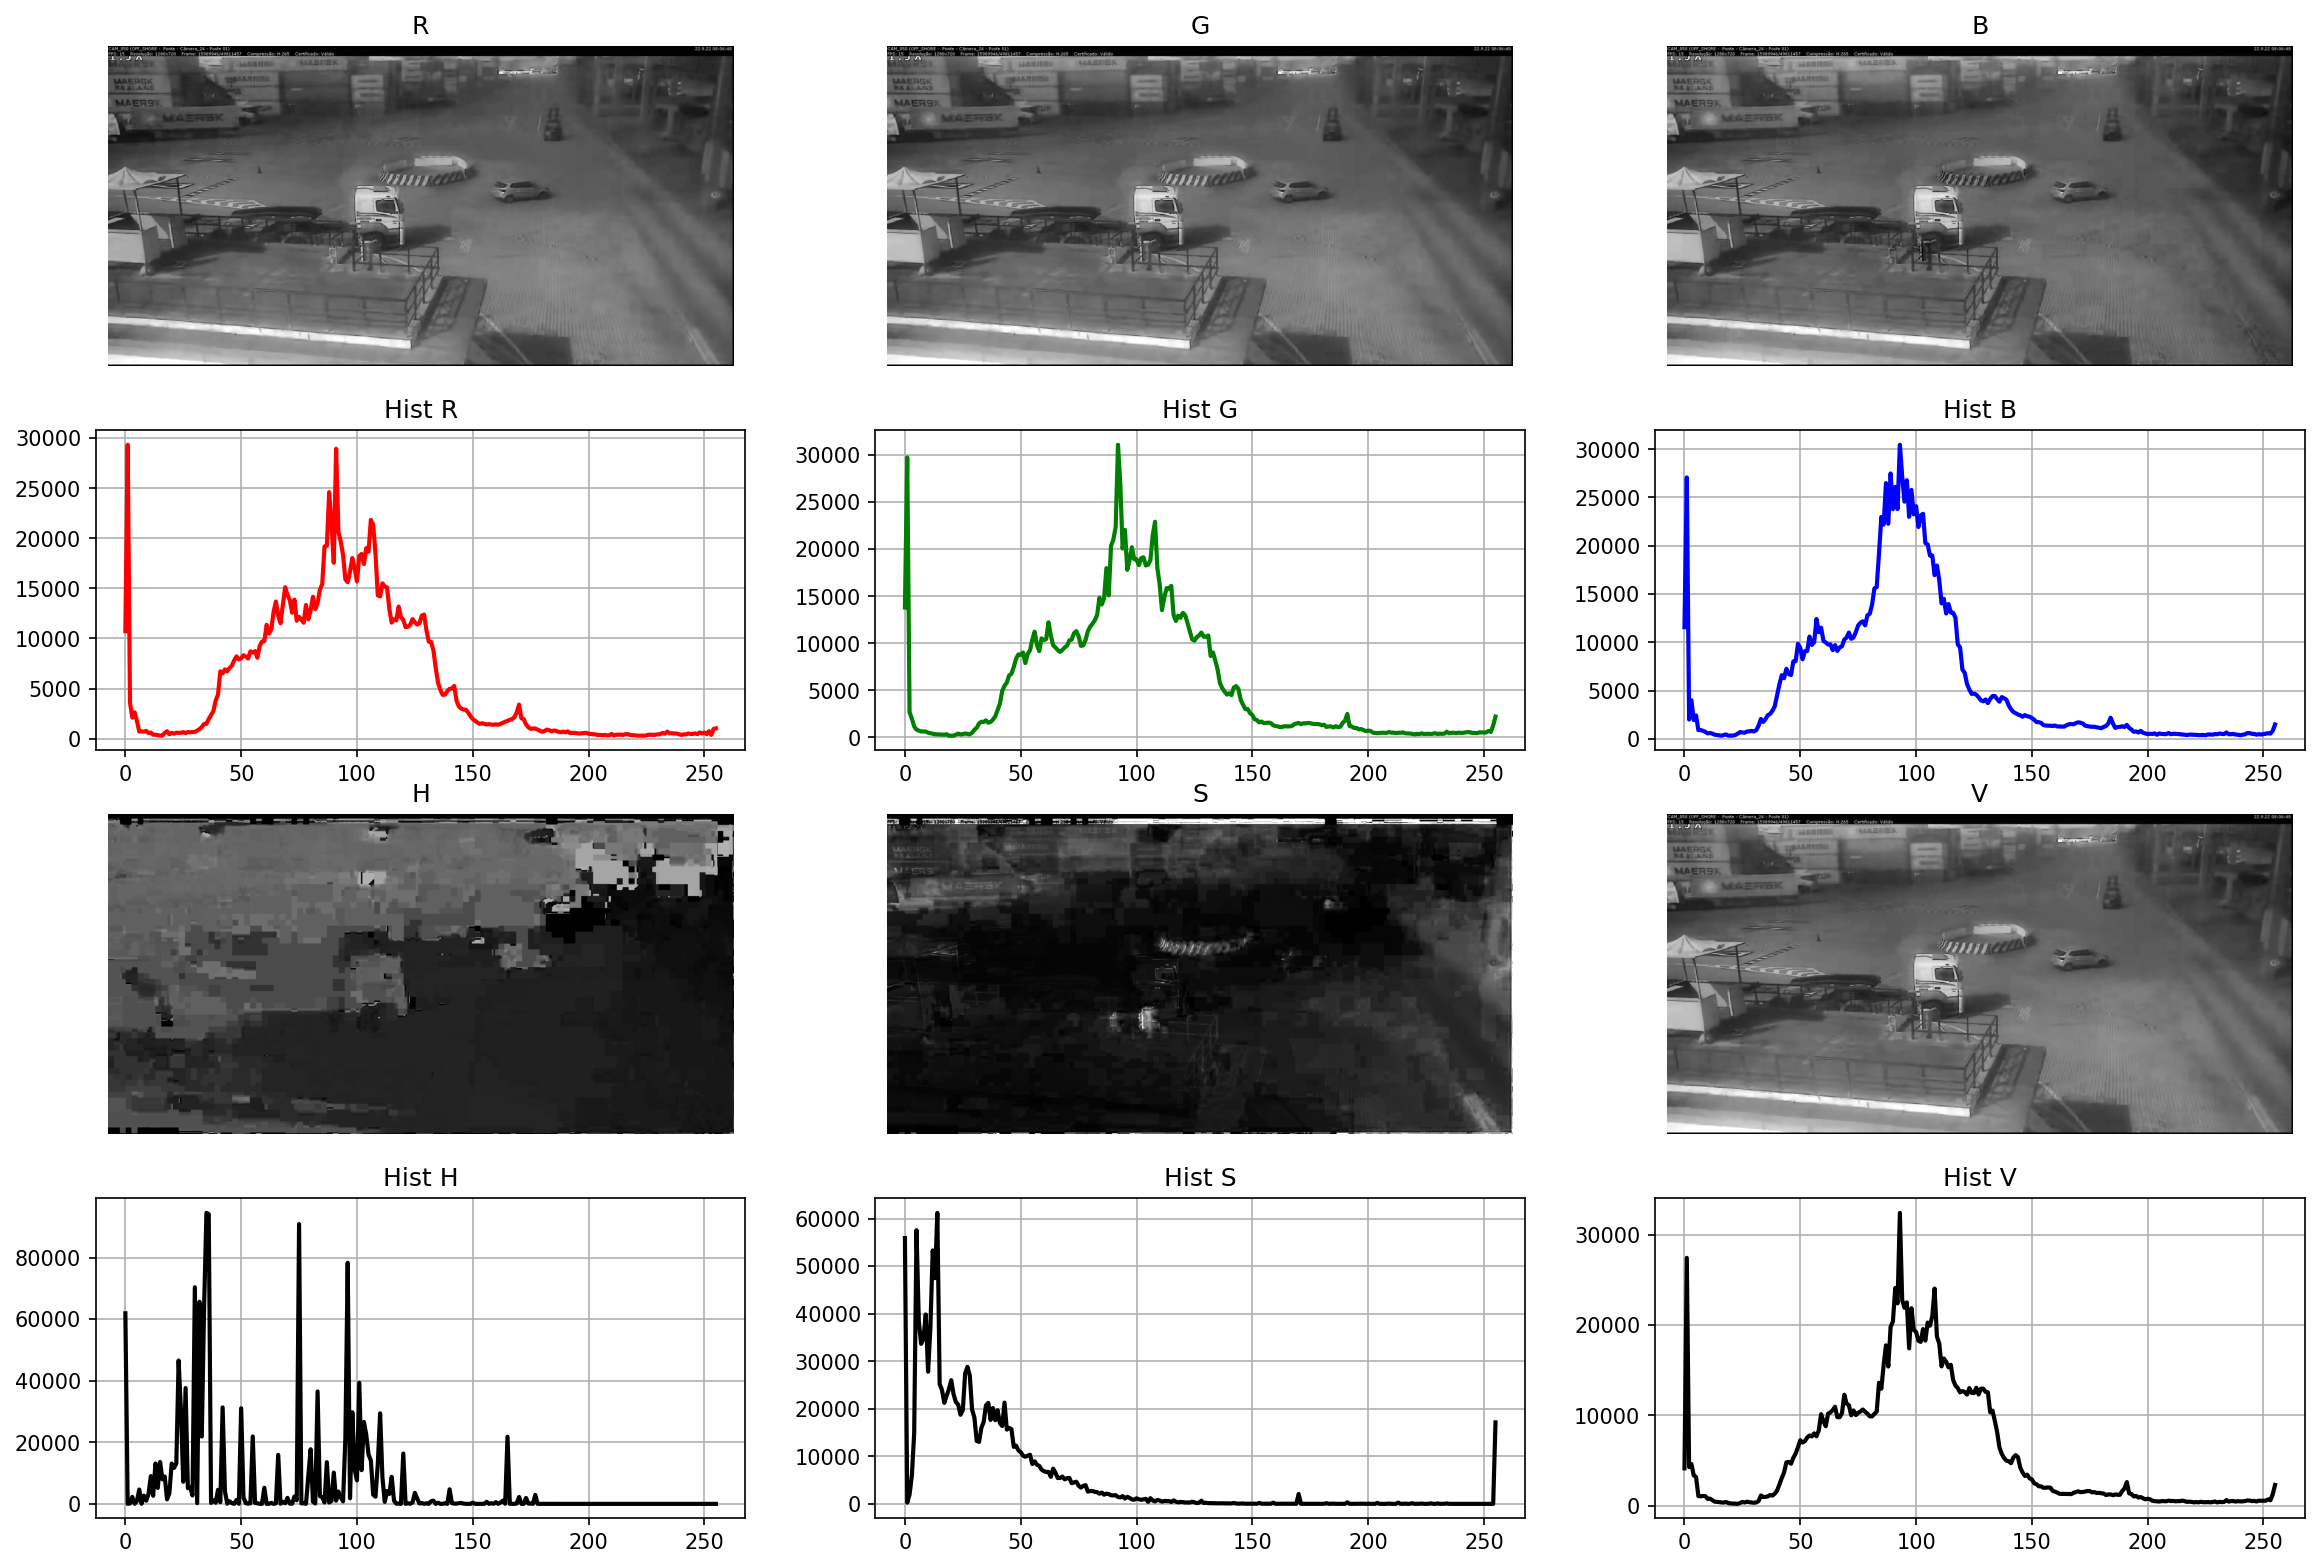

In [89]:
img=cv2.cvtColor(cv2.imread("dataset_pecem\cam_50\Bom\Imagem5.jpg"),cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(img)
imgGray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#  1
linhas, colunas= 4, 3
fig1 = plt.figure(num=1,figsize=(19,13),dpi=150)  
plt.subplot(linhas,colunas,1); plt.axis("off"), plt.imshow(r,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,1).set_title("R")
plt.subplot(linhas,colunas,2); plt.axis("off"), plt.imshow(g,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,2).set_title("G")
plt.subplot(linhas,colunas,3); plt.axis("off"), plt.imshow(b,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,3).set_title("B")


#  2
hist_red = cv2.calcHist([img],[0],None,[256],[0,256])
hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
hist_blue = cv2.calcHist([img],[2],None,[256],[0,256])
hist = cv2.calcHist([imgGray],[0],None,[256],[0,256])

plt.subplot(linhas,colunas,4);  plt.plot(hist_red,color='red', lw='2'); plt.subplot(linhas,colunas,4).set_title("Hist R") ;plt.grid()
plt.subplot(linhas,colunas,5);  plt.plot(hist_green,color='green', lw='2'); plt.subplot(linhas,colunas,5).set_title("Hist G");plt.grid()
plt.subplot(linhas,colunas,6);  plt.plot(hist_blue,color='blue', lw='2'); plt.subplot(linhas,colunas,6).set_title("Hist B");plt.grid()

#  3
imgHSV=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(imgHSV)

plt.subplot(linhas,colunas,7); plt.axis("off"), plt.imshow(h,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,7).set_title("H")
plt.subplot(linhas,colunas,8); plt.axis("off"), plt.imshow(s,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,8).set_title("S")
plt.subplot(linhas,colunas,9); plt.axis("off"), plt.imshow(v,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,9).set_title("V")

#  4
hist_H = cv2.calcHist([imgHSV],[0],None,[256],[0,256])
hist_S = cv2.calcHist([imgHSV],[1],None,[256],[0,256])
hist_V = cv2.calcHist([imgHSV],[2],None,[256],[0,256])
hist = cv2.calcHist([imgHSV],[0],None,[256],[0,256])

plt.subplot(linhas,colunas,10);  plt.plot(hist_H,color='black', lw='2'); plt.subplot(linhas,colunas,10).set_title("Hist H");plt.grid()
plt.subplot(linhas,colunas,11);  plt.plot(hist_S,color='black', lw='2'); plt.subplot(linhas,colunas,11).set_title("Hist S");plt.grid()
plt.subplot(linhas,colunas,12);  plt.plot(hist_V,color='black', lw='2'); plt.subplot(linhas,colunas,12).set_title("Hist V");plt.grid()

fig1.savefig('teste.png',dpi=fig1.dpi,bbox_inches='tight')

#### Auxiliar

##### HTML Paths

In [72]:
def pathsHTML(path_dataset):
    paths=[]
    """Retorna uma lista de paths de todas as imagens para um dataset exatamente no formato que temos:
    # DATASET
    #   # CAM 1
    #       # FOLDER 1
    #           # IMAGE 1
    """
    for cam in sorted(os.listdir(path_dataset)):                    # cam
        cur_cam = path_dataset + "\\" + cam                           
        for folder in sorted(os.listdir(path_dataset+f"\\{cam}")):  # folder
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       
            for image_path in sorted(glob.glob(cur_folder + "\*")): # image   
                    paths.append(image_path)
    return paths




paths_list=pathsHTML("channel_analyze\infos_Lab&YCrCb")
paths_list
string=""
for i in paths_list:
        string+="'" +i+ "'" +","
print(string)
import pyperclip
pyperclip.copy(string)

'channel_analyze\infos_Lab&YCrCb\cam_124_1\Bom\infosLY_Imagem21.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Bom\infosLY_Imagem22.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Excelente\infosLY_Imagem19.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Excelente\infosLY_Imagem20.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Pessimo\infosLY_Imagem25.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Pessimo\infosLY_Imagem26.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Ruim\infosLY_Imagem23.png','channel_analyze\infos_Lab&YCrCb\cam_124_1\Ruim\infosLY_Imagem24.png','channel_analyze\infos_Lab&YCrCb\cam_321\Bom\infosLY_Imagem29.png','channel_analyze\infos_Lab&YCrCb\cam_321\Bom\infosLY_Imagem30.png','channel_analyze\infos_Lab&YCrCb\cam_321\Excelente\infosLY_Imagem27.png','channel_analyze\infos_Lab&YCrCb\cam_321\Excelente\infosLY_Imagem28.png','channel_analyze\infos_Lab&YCrCb\cam_321\Pessimo\infosLY_Imagem33.png','channel_analyze\infos_Lab&YCrCb\cam_321\Pessimo\infosLY_Imagem34.png','cha

##### HTML saveinfos canais + histogramas

In [12]:
def saveInfos(path_dataset,path_destination):
    path=path_destination+'\\infos_Lab&YCrCb'
    newDir(path)
    linhas, colunas= 4, 3 # plot

    for cam in sorted(os.listdir(path_dataset)):
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)
        newDir(path+'\\'+cam)

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       
            newDir(path+'\\'+cam+'\\'+folder)
            for image_path in sorted(glob.glob(cur_folder + "\*")):    
                    label_img=image_path.split("\\")[-1].split('.')[0] 
                    print(label_img)           
                    image = cv2.imread(image_path)
                    # image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # BGR -> RGB
                    # imageGray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # BGR -> GRAY
                    # imageHSV=cv2.cvtColor(image,cv2.COLOR_BGR2HSV_FULL) # BGR -> HSV
                    # r,g,b=cv2.split(imageRGB)
                    # h,s,v=cv2.split(imageHSV)
                    imageYcrcb=cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
                    imageLab=cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
                    Y,CR,CB=cv2.split(imageYcrcb)
                    L,A,B=cv2.split(imageLab)


                    fig = plt.figure(figsize=(19,13),dpi=150)  
                    plt.subplot(linhas,colunas,1); plt.axis("off"), plt.imshow(Y,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,1).set_title("Y")
                    plt.subplot(linhas,colunas,2); plt.axis("off"), plt.imshow(CR,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,2).set_title("Cr")
                    plt.subplot(linhas,colunas,3); plt.axis("off"), plt.imshow(CB,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,3).set_title("Cb")


                    hist_Y   = cv2.calcHist([imageYcrcb],[0],None,[256],[0,256])
                    hist_Cr = cv2.calcHist([imageYcrcb],[1],None,[256],[0,256])
                    hist_Cb  = cv2.calcHist([imageYcrcb],[2],None,[256],[0,256])
                    # hist       = cv2.calcHist([imageGray],[0],None,[256],[0,256])

                    plt.subplot(linhas,colunas,4);  plt.plot(hist_Y,    color='black', lw='2'); plt.subplot(linhas,colunas,4).set_title("Hist Y");plt.grid()
                    plt.subplot(linhas,colunas,5);  plt.plot(hist_Cr,color='black', lw='2'); plt.subplot(linhas,colunas,5).set_title("Hist Cr");plt.grid()
                    plt.subplot(linhas,colunas,6);  plt.plot(hist_Cb,  color='black', lw='2'); plt.subplot(linhas,colunas,6).set_title("Hist Cb");plt.grid()

                    plt.subplot(linhas,colunas,7); plt.axis("off"), plt.imshow(L,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,7).set_title("L")
                    plt.subplot(linhas,colunas,8); plt.axis("off"), plt.imshow(A,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,8).set_title("A")
                    plt.subplot(linhas,colunas,9); plt.axis("off"), plt.imshow(B,cmap='gray', vmin=0, vmax=255); plt.subplot(linhas,colunas,9).set_title("B")

                    hist_L = cv2.calcHist([imageLab],[0],None,[256],[0,256])
                    hist_A = cv2.calcHist([imageLab],[1],None,[256],[0,256])
                    hist_B = cv2.calcHist([imageLab],[2],None,[256],[0,256])
                    # hist = cv2.calcHist([imageHSV],[0],None,[256],[0,256])

                    plt.subplot(linhas,colunas,10);  plt.plot(hist_L,color='black', lw='2'); plt.subplot(linhas,colunas,10).set_title("Hist L");plt.grid()
                    plt.subplot(linhas,colunas,11);  plt.plot(hist_A,color='black', lw='2'); plt.subplot(linhas,colunas,11).set_title("Hist A");plt.grid()
                    plt.subplot(linhas,colunas,12);  plt.plot(hist_B,color='black', lw='2'); plt.subplot(linhas,colunas,12).set_title("Hist B");plt.grid()
                    # escrita

                    fig.savefig(f'{path}'+f'\\{cam}'+f'\\{folder}\\'+f'infosLY_{label_img}.png',dpi=fig.dpi,bbox_inches='tight')
                    fig.clf()
                    plt.close(fig)

In [ ]:
saveInfos("dataset_pecem","channel_analyze")

In [69]:
def saveInfosComparasionH(path_dataset,path_destination):
    """Salva as figs no modelo pensado para comparação dos canais H"""
    path=path_destination+'\\comparasion-H'
    newDir(path)
    linhas, colunas= 1,3 # plot

    for cam in sorted(os.listdir(path_dataset)):
        """Para cada camera é necessario uma analise diferente"""
        cur_cam = path_dataset + "\\" + cam                           
        print("Cur_cam: "+cur_cam)
        newDir(path+'\\'+cam)

        HSV_excelente_diurno=cv2.cvtColor(cv2.imread(sorted(glob.glob(cur_cam+"\\Excelente"+"\\*"))[0]),cv2.COLOR_BGR2HSV_FULL) # supondo que a primeira imagem é diurna
        HSV_excelente_noturno=cv2.cvtColor(cv2.imread(sorted(glob.glob(cur_cam+"\\Excelente"+"\\*"))[1]),cv2.COLOR_BGR2HSV_FULL) # supondo que a primeira imagem é diurna
        hist_Hexe_diurno= cv2.calcHist([HSV_excelente_diurno],[0],None,[256],[0,256]) # histograma do canal H para imagem execelente e diurna
        hist_Hexe_noturno= cv2.calcHist([HSV_excelente_noturno],[0],None,[256],[0,256]) # ' ' ' ' ' execelente e noturna

        for folder in sorted(os.listdir(cur_cam)):
            cur_folder = path_dataset + "\\" + cam + "\\" +folder                       
            newDir(path+'\\'+cam+'\\'+folder)
            for image_path,aux in zip(sorted(glob.glob(cur_folder + "\*")),range(2)):    # preciso saber se a imagem é diurna ou noturna
                  
                    cur_imageHSV = cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2HSV_FULL)
                    cur_hist_H= cv2.calcHist([cur_imageHSV],[0],None,[256],[0,256]) # histograma do canal H para imagem execelente e diurna ou noturna


                    fig = plt.figure(figsize=(19,4),dpi=150)  
                    if(aux==0):
                        # a imagem é diurna
                        label_img=image_path.split("\\")[-1].split('.')[0]+"_diurna"
                        print(label_img)
                        ymax=max(max(hist_Hexe_diurno),max(cur_hist_H))+10000
                        hist_base=hist_Hexe_diurno  # o histograma que será subtraido do atual
                        plt.subplot(linhas,colunas,1).set_ylim(-7000,ymax); plt.plot( hist_Hexe_diurno,color='black', lw='2'); plt.subplot(linhas,colunas,1).set_title("Histograma (H) Excelente Diurna");plt.grid()      
                    if(aux==1):
                        # a imagem é noturna
                        label_img=image_path.split("\\")[-1].split('.')[0]+"_noturna"
                        print(label_img)      
                        ymax=max(max(hist_Hexe_noturno),max(cur_hist_H))+10000
                        hist_base=hist_Hexe_noturno
                        plt.subplot(linhas,colunas,1).set_ylim(-7000,ymax);  plt.plot( hist_Hexe_noturno,  color='black', lw='2'); plt.subplot(linhas,colunas,1).set_title("Histograma (H) Excelente Noturna");plt.grid() 
                 
    
                    plt.subplot(linhas,colunas,2).set_ylim(-7000,ymax);  plt.plot(cur_hist_H,color='black', lw='2'); plt.subplot(linhas,colunas,   2).set_title("Histograma (H) da imagem atual");plt.grid()
                    plt.subplot(linhas,colunas,3).set_ylim(-7000,ymax);  plt.plot(abs(hist_base-cur_hist_H),  color='black', lw='2'); plt.subplot(linhas,colunas, 3).set_title("Modulo da diferença");plt.grid()

                    # escrita
                    fig.savefig(f'{path}'+f'\\{cam}'+f'\\{folder}\\'+f'{label_img}.png',dpi=fig.dpi,bbox_inches='tight')
                    fig.clf()
                    plt.close(fig) 

In [70]:
saveInfosComparasionH("dataset_pecem","channel_analyze")

Cur_cam: dataset_pecem\cam_124_1
Imagem21_diurna
Imagem22_noturna
Imagem19_diurna
Imagem20_noturna
Imagem25_diurna
Imagem26_noturna
Imagem23_diurna
Imagem24_noturna
Cur_cam: dataset_pecem\cam_321
Imagem29_diurna
Imagem30_noturna
Imagem27_diurna
Imagem28_noturna
Imagem33_diurna
Imagem34_noturna
Imagem31_diurna
Imagem32_noturna
Cur_cam: dataset_pecem\cam_323
Imagem37_diurna
Imagem38_noturna
Imagem35_diurna
Imagem36_noturna
Imagem41_diurna
Imagem42_noturna
Imagem39_diurna
Imagem40_noturna
Cur_cam: dataset_pecem\cam_50
Imagem5_diurna
Imagem6_noturna
Imagem1_diurna
Imagem2_noturna
Imagem09_diurna
Imagem10_noturna
Imagem7_diurna
Imagem8_noturna
Cur_cam: dataset_pecem\cam_77_3
Imagem13_diurna
Imagem14_noturna
Imagem11_diurna
Imagem12_noturna
Imagem17_diurna
Imagem18_noturna
Imagem15_diurna
Imagem16_noturna


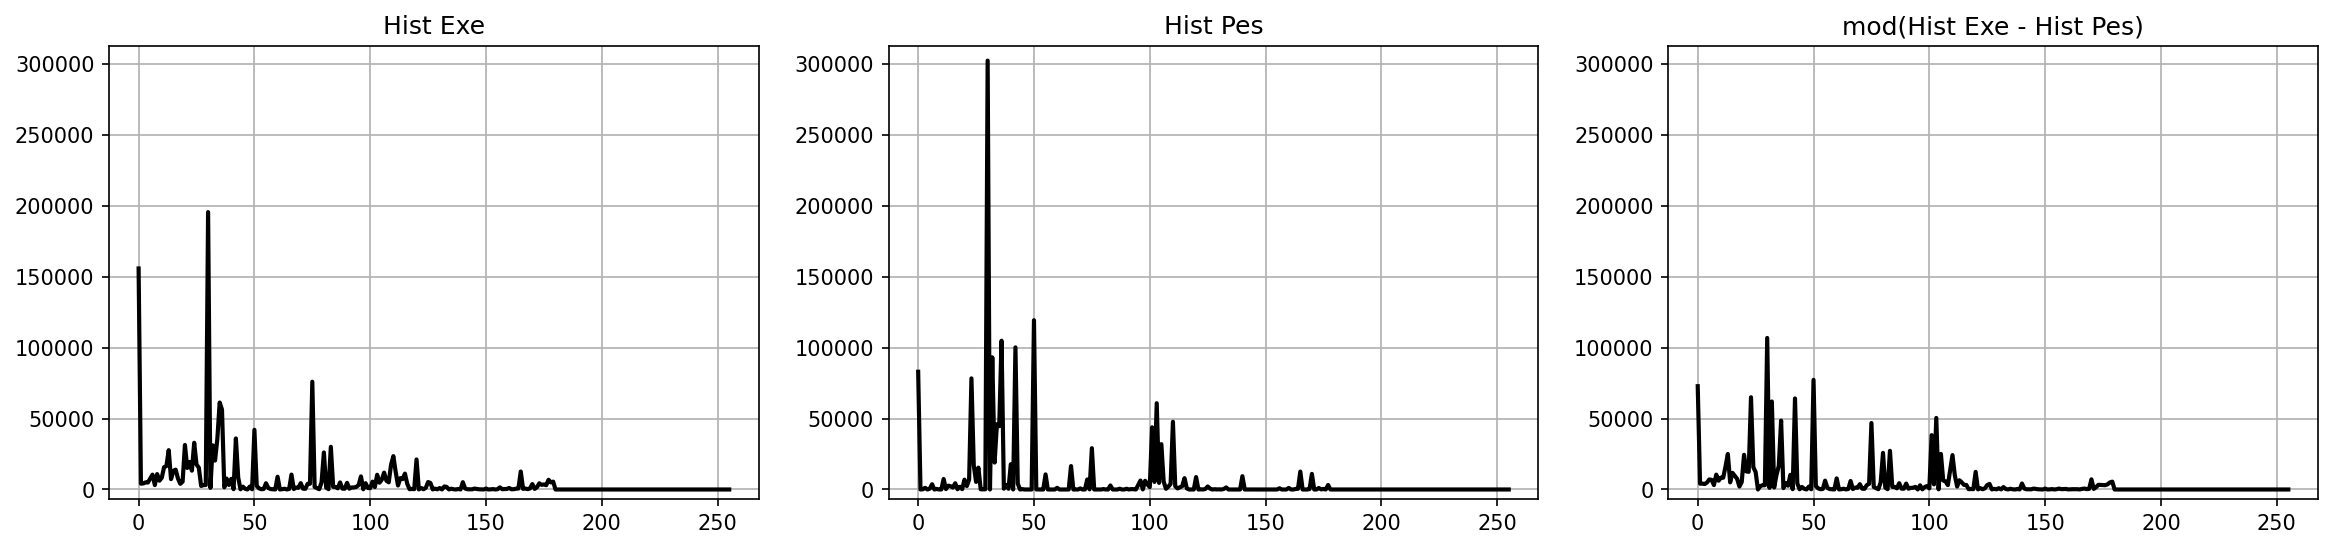

In [46]:
# cam 50
HSVimageExcelente=cv2.cvtColor(cv2.imread('dataset_pecem\cam_50\Excelente\Imagem1.jpg'),cv2.COLOR_BGR2HSV)
HSVimagePessima=cv2.cvtColor(cv2.imread('dataset_pecem\cam_50\Pessimo\Imagem09.jpg'),cv2.COLOR_BGR2HSV)


# cv2.imshow("H exe",HimageExcelente)
# cv2.imshow("H ruim",HimageRuim)

# cv2.waitKey(0)
fig =plt.figure(figsize=(19,4),dpi=150)

hist_HExe= cv2.calcHist([HSVimageExcelente],[0],None,[256],[0,256])
hist_HPes= cv2.calcHist([HSVimagePessima],[0],None,[256],[0,256])

plt.subplot(131).set_ylim(-7000,max(max(hist_HExe),max(hist_HPes))+10000);  plt.plot(hist_HExe,color='black', lw='2'); plt.subplot(131).set_title("Hist Exe");plt.grid()
plt.subplot(132).set_ylim(-7000,max(max(hist_HExe),max(hist_HPes))+10000);  plt.plot(hist_HPes,color='black', lw='2'); plt.subplot(132).set_title("Hist Pes");plt.grid()
plt.subplot(133).set_ylim(-7000,max(max(hist_HExe),max(hist_HPes))+10000);  plt.plot(abs(hist_HExe-hist_HPes),color='black', lw='2'); plt.subplot(133).set_title("mod(Hist Exe - Hist Pes)");plt.grid()
                  
# plt.subplot(325); plt.plot(abs(hist_HPes-hist_HExe),color='black', lw='2'); plt.subplot(325).set_title("Hist");plt.grid()